In [1]:
import pandas as pd
from pandas import DataFrame
from pandas import read_csv, pivot_table
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
# # submission = pd.read_csv('submission.csv')
# print(train.shape, test.shape, submission.shape)

In [3]:
# 데이터 확인
print(train.head(3))
print(test.head(3))
# print(submission.head(3))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
   PassengerId  Pclass                              Name     Sex   Age  SibSp  \
0          892       3                  Kelly, Mr. James    male  34.5      0   
1          893       3  Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   
2          894       2         Myles, Mr. Thomas Francis    male  62.0      0   

   Parch 

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.describe(include='all') # include='all'은 문자열에 대해서도 통계를 내준다.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

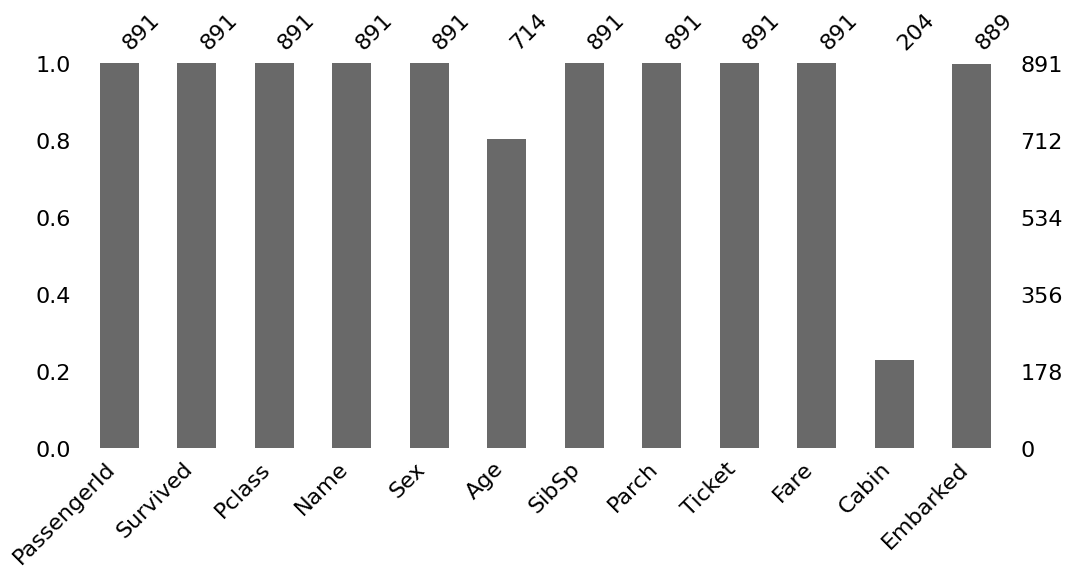

In [7]:
import missingno as msno
msno.bar(train,figsize=(12,5))

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# matrix 함수를 사용하면 데이터프레임의 어느 위치(행 인덱스 기준)에 결측값이 있는지 확인 할 수 있다.
# 결측값이 분포하는 경향을 파악할 수 있다.

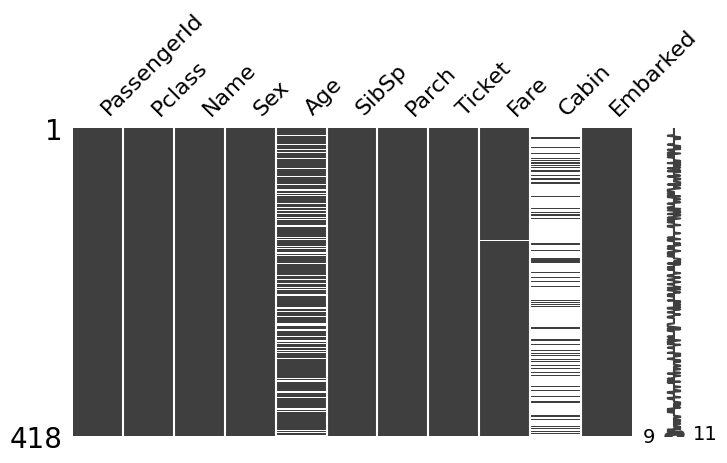

In [10]:
msno.matrix(test,figsize=(8,4))
plt.show()

In [11]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
train1 = train.drop(['Name','Sex','Ticket','Embarked','Cabin'],axis=1)
train1.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


- 상관 계수 테이블을 히트맵으로 시각화한다. corr 함수는 숫자형 데이터로 구성된 열
- Pclass, Age, SibSp, Parch, Fare, Survived에 대해서만 상관 계수를 계산한다.

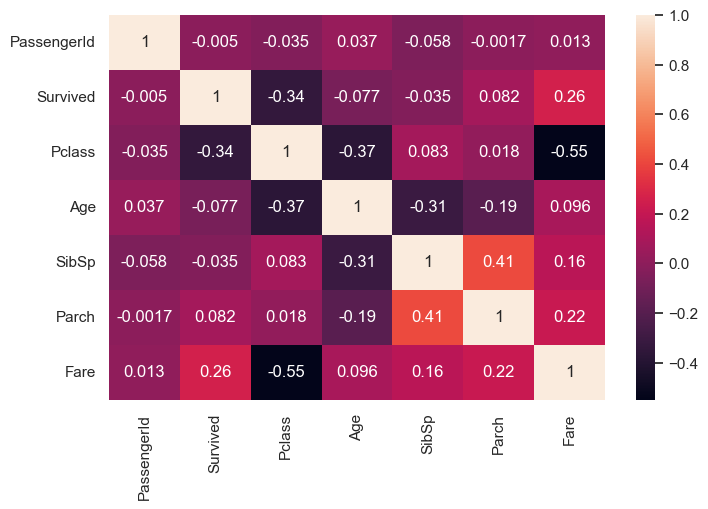

<Figure size 800x500 with 0 Axes>

In [13]:
# 숫자형 변수 간의 상관 관계를 계산하여 히트맵 그리기
plt.figure(figsize=(8,5))
sns.set(font_scale = 1.0)
sns.heatmap(train1.corr(),annot=True,cbar=True)
plt.figure(figsize=(8,5))
sns.set(font_scale=1.0)


In [14]:
### Pclass,Age,Fare 상관관계 있어보임

In [15]:
# train1.info()
# train1.describe()
# train1 = train1.fillna(29)
# train1
# names = train1.columns
# n = len(names)
# pv = 0.05

# data = []

# for i in range(0, n):
#     fields = names[1] + 'vs' + names[i]
#     s, p = stats.pearsonr(train1[names[1]], train1[names[i]])
#     result = p < pv

#     data.append({'fields': fields, 'statistic':s, 'pvalue': p, 'result': result})

# rdf = DataFrame(data)
# rdf.set_index('fields', inplace=True)
# rdf


In [16]:
train1.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


survived와 유의관계가 있는 것은 Pclass, Age, Parch, Fare로 확인된다. 그중 corr에서 유의관계를 보인 Pclass와 Fare가 survived와 유의관계가 있고 상관이 있는 것으로 확인된다.

- 목표변수인 Survived열과 상관계수가 높은 피처는 Pclass와 Fare이다. 
- 객실 등급을 나타내는 Pclass와 객실 요금을 뜻하는
- Fare 상관계수는 -0.55이므로 매우 강한 음의 상관 관계가 있다.
- 이를 통해 객실 등급에 따라 객실 요금이 달라지는 것을 알 수 있다.

In [17]:
# concat 함수로 데이터프레임(trian, test)을 위 아래 방향(axis=0)으로 연결한다.
# train 데이터와 test 데이터를 구분하기 위해 TrainSplit열을 추가하고 
# train과 test를 값으로 지정한다.
# 타이타닉 전체 데이터셋 준비 
train['TrainSplit'] = 'train'
test['TrainSplit'] = 'test'
data = pd.concat([train,test],axis=0)
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TrainSplit
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train


In [18]:
# 가장 먼저 숫자형 데이터를 가진열을 추가하고 data-num 변수에 저장한다.
# fillna() 메소드를 사용하여 'Age'열의 결측값을 평균값으로 대체한다.
# 'Fare'열의 결측값은 가장 빈도수가 많은 값으로 대체한다(최빈값)

# 숫자형 피처 추출
data_num = data.loc[:,['Survived','Pclass','Age','SibSp','Parch','Fare']]

# 결측값 대체
data_num['Age']=data_num['Age'].fillna(data_num['Age'].mean())
data_num['Fare'] = data_num['Fare'].fillna(data_num['Fare'].mode()[0])

# 학습용 데이터와 예측 대상인 테스트 데이터 구분
selected_feature = ['Pclass','Age','SibSp','Parch','Fare']
x_train = data_num.loc[data['TrainSplit']=='train',selected_feature]
y_train = data_num.loc[data['TrainSplit']=='train','Survived']

x_test = data_num.loc[data['TrainSplit']=='test',selected_feature]
y_test = data_num.loc[data['TrainSplit']=='test','Survived']
print("Train 데이터셋 크기 :", x_train.shape, y_train.shape)
print("Test 데이터셋 크기 :", x_test.shape)
# print(data['TrainSplit'].head())
# print(x_test.head())


Train 데이터셋 크기 : (891, 5) (891,)
Test 데이터셋 크기 : (418, 5)


In [19]:
x_test.isnull().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [20]:
# 학습 데이터(X_train, y_train)를 훈련 데이터 80%, 검증 데이터 20%로 분할한다.
# 로지스틱 회귀분류 모델에 훈련데이터를 입력하여 학습시킨다.
# 검증 데이터에 대한 예측값(y_val_pred)을 실제값(y_val)값과 비교하여 
# 혼동행렬을 계산하고 그래프로 표시한다.
 

<Axes: >

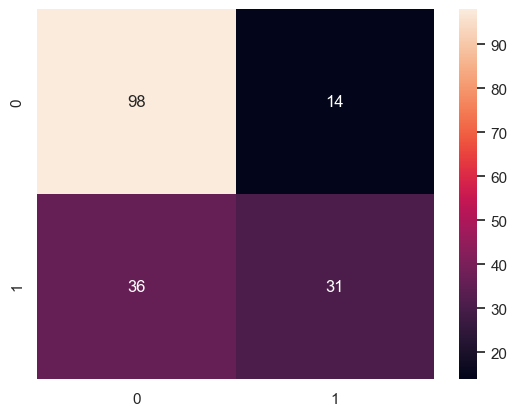

In [21]:
# 훈련 데이터 - 검증 데이터 분할
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val = train_test_split(x_train,y_train,test_size = 0.2,shuffle =3, random_state=20)

# 로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_tr,y_tr)
y_val_pred = lr_model.predict(x_val)
# Confusion Matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_val,y_val_pred),annot=True)
# cbar를 통해 colorbar의 유무를 정해줄 수 있다.
# linewidths 각 cell마다 선을 넣어주고 굵기를 정할 수 있다.
# annot 각 cell의 값을 표기할 수 있다. 이때 fmt를 이용해 각 cell의 값의 데이터 형태를 지정해주는 과정이 필요할 수 있다.
# vmin, vmax로 색으로 최대값, 최소값을 표현할 수 있다. ex) vmin=200, vmax=500
# plt.show()


- 모형의 예측값과 실제값을 각각 축으로 하는 2x2 매트릭스로 표현한 것을 혼동 행렬이라고 부르고
- 이를 근거로 정밀도, 재현율, f1(f1-score)를 산출할 수 있다. 
- 정밀도는 True로 예측한 분석 대상 중에서 실제 값이 True인 비율을 말한다.
- 정밀도가 높다는 것은 False Positive(실제 False를 True로 잘못 예측하는) 오류가 적다는 것을 의미한다.
- 재현율(Recall)은 실제 True 중에서 True로 예측하여 모형이 적중한 비율을 말한다.
- 재현율이 높다는 것은 False Negative(실제True를 False로 잘못 예측하는) 오류가 낮다는 뜻이다.
- F1지표는 정확도와 재현율의 조화 평균을 계산한 값으로, 모형의 예측력을 종합적으로 평가하는 지표다.
- 지표값이 높을수록 분류 모형의 예측력이 좋다고 말할 수 있다. 


In [22]:
# 평가지표
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
print("Accuracy:%.4f" % accuracy_score(y_val, y_val_pred))
print("Precision:%.4f" % precision_score(y_val, y_val_pred)) # 정밀도
print("Recall:%.4f" % recall_score(y_val, y_val_pred)) # 재현율
print("F1:%.4f" % f1_score(y_val, y_val_pred)) # 정확도와 재현율의 조화
print("AUC:%.4f" % roc_auc_score(y_val, y_val_pred)) # 데이콘 경진대회에서 사용하는 평가지표 1에가까울소록 좋은 모델링

Accuracy:0.7207
Precision:0.6889
Recall:0.4627
F1:0.5536
AUC:0.6688


# 모델 예측

##### 테스트 데이터(x_test)를 모델 예측에 사용한다. astype함수로 예측값을 정수로 반환한다

In [23]:
x_test.head().isnull().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [24]:
y_test.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Survived, dtype: float64

In [25]:
x_test.isnull().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [26]:
# test 데이터에 대한 예측값 정리
y_test_pred=lr_model.predict(x_test)

# 제출 양식에 맞게 정리

# 제출파일 저장
# submission_filepath = drive_path + 'baseline_num_lr_submission_001.csv'
# submission, to_csv(submission_filepath, index=False)
# submission.head(5)

# Survived : 생존여부

###### 예측의 대상이 되는 목표 레이블인 Survived 열의 데이터 분포를 확인한다. Survived 열은 시리즈 객체 형태이므로 Value_counts 메소드를 사용할 수 있다.
###### 결측값을 포함하려면 dropna 옵션을 False로 설정한다. 결과를보면 train 데이터에서 생존자(class 1)는 342명으로 확인된다.

In [27]:
# 타킷 레이블의 분포 확인
train['Survived'].value_counts(dropna=False)


Survived
0    549
1    342
Name: count, dtype: int64

In [28]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TrainSplit
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train


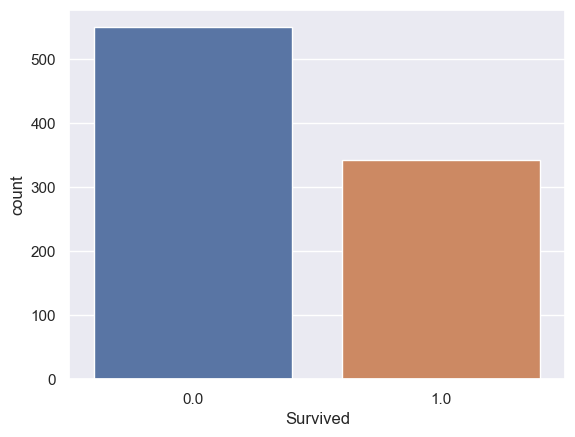

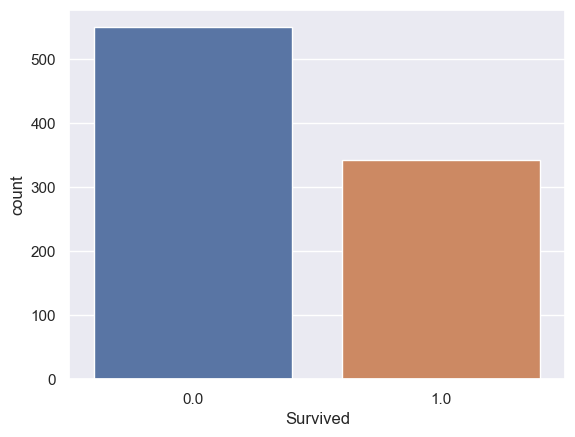

In [29]:
# 사본 countplot으로 생존자(class 1)와 사망자(class 0)의 분포를 비교한다.
# TrainSplit 열을 이용하여 train 데이터만 따로 추출하여 적용한다.

# 객실 등급별 분포 확인
sns.countplot(x='Survived',data=data)
plt.show()
sns.countplot(x='Survived',data=data.loc[data['TrainSplit']=='train',:])
plt.show()

- 객실 등급을 나타내는 Pcalss 열의 데이터 분포를 확인한다. 3등석 승객이 가장 많고, 1등석과 2등석은 비슷한 숫자로 파악된다. hue 옵션을 이용하여 train데이터와 test데이터를 구분해보면 분포가 비교적 고르게 나누어 진 것을 볼 수 있다.

<Axes: xlabel='Pclass', ylabel='count'>

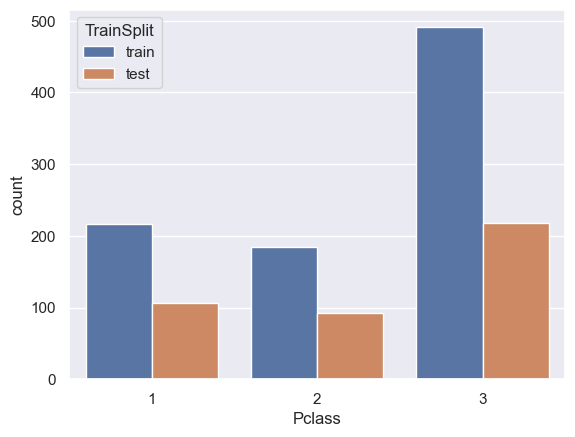

In [30]:
# train - test 데이터 분포
sns.countplot(x='Pclass',hue="TrainSplit",data=data)

<Axes: xlabel='Pclass', ylabel='count'>

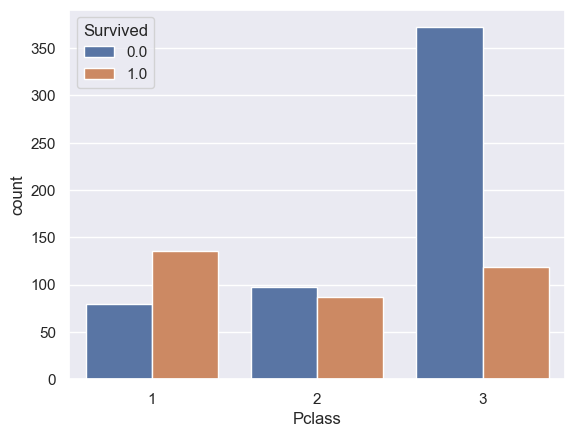

In [31]:
# train 데이터 중에서 객실 등급에 따른 생존자 비율을 살펴본다.
sns.countplot(x='Pclass',hue='Survived',data=data.loc[data['TrainSplit']=='train',:])

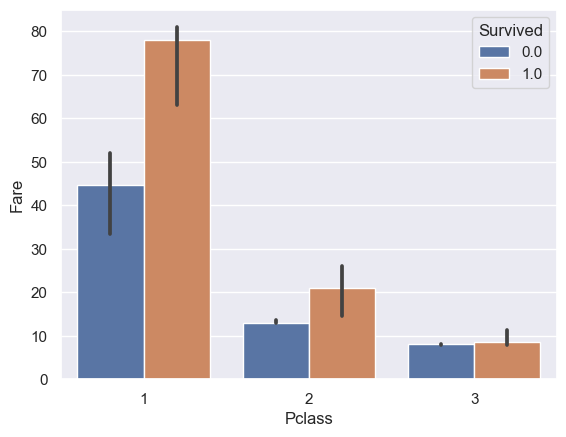

In [32]:
# 이번에는 barplot 함수를 사용해 등급별 객실 요금의 중간값 분포를 알아본다.

# Pclass 별 Fare 객실 요금의 중간값 비교
sns.barplot(x='Pclass',y='Fare',hue='Survived',data=data,estimator=np.median)
# estimator 표집값들로 부터 모수의 값을 추정하는 방법
plt.show()

In [33]:
# 남여 성별에 따른 생존율 분포를 파악해 본다.
# 동시에 시본 histplot 함수의 multiple 옵션을 조정한다.
# multiple 속성에 dodge를 설정하면 hue옵션의 데이터를 기준으로
# 막대그래프를 서로 겹치지 않게 수평으로 평쳐서 분리 표시한다.

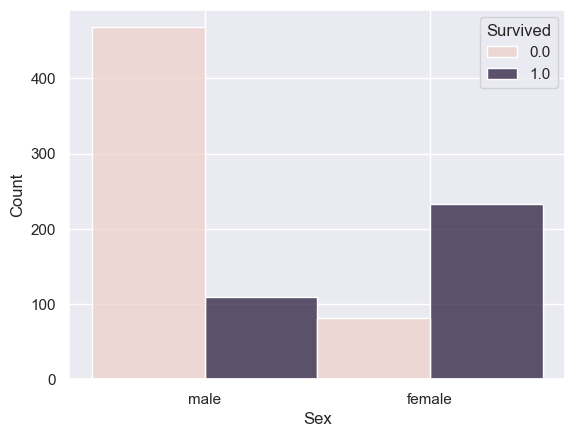

In [34]:
# histplot 함수 - dodge 옵션
sns.histplot(x='Sex', hue='Survived', multiple='dodge', data=data)
plt.show()

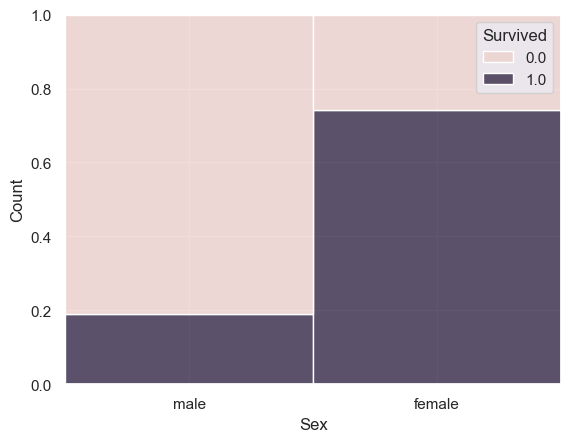

In [35]:
# multiple 속성에 fill 옵션을 설정하면 hue 속성의 상대적 비율을 백분율로 표시한다.

# histplot 함수 - fill 옵션
sns.histplot(x='Sex', hue='Survived', data=data, multiple='fill')
plt.show()

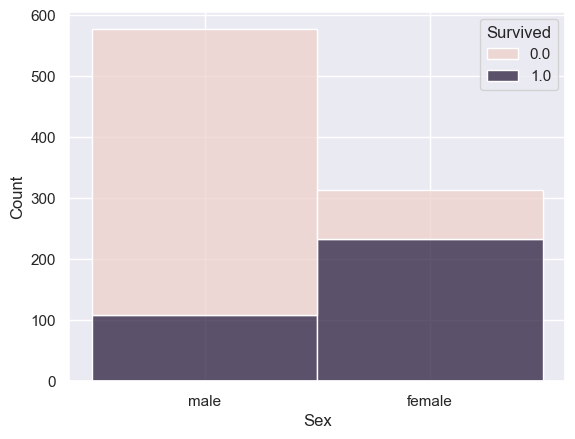

In [36]:
# histplot 함수 - stack 옵션
# 그래프를 상하 방향으로 누적하여 나타낸다.
sns.histplot(x='Sex', hue='Survived', data=data, multiple='stack')
plt.show()

###### 머신러닝 모델은 female, male 등의 문자열 데이터를 그대로 학습에
###### 사용할 수 없기때문에 숫자형 데이터로 변환하는 작업이 필요하다
###### loc인덱서의 행 인덱스를 필터링하여 추출하고
###### Sex열의 데이터가 femail이면 숫자 0으로 바꾸고 male이면 숫자 1로 바꾼다.

In [37]:
# 레이블 인코딩(femail = 0, male = 1)
data.loc[data['Sex']=='male','Sex'] = 1
data.loc[data['Sex']=='female','Sex'] = 0
data['Sex'] = data['Sex'].astype(int)
# data['Sex']

# 성별 분포 확인
data['Sex'].value_counts()

Sex
1    843
0    466
Name: count, dtype: int64

In [38]:
# 문자열 데이터를 다루는 방법
# 승객 이름이 들어 있는 Name 열은 문자열 데이터로만 구성이 되어 있다.
# unique 함수로 고유값을 확인한다.
data['Name'].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina', ..., 'Saether, Mr. Simon Sivertsen',
       'Ware, Mr. Frederick', 'Peter, Master. Michael J'], dtype=object)

- name 열을 선택하고 str 속성을 적용하면 문자열을 직접 추출할 수 있다. 
- split 메소드를 적용하면 이름을 나타내는 문자열을 쉼표(,)를 기준으로 분할한다.
- 쉼표를 기준으로 2개의 문자열로 나눠지는데, 타이틀(Mr, Ms, 등)이 들어있는 뒷부분의 문자열을 따로 추출한다.

In [39]:
## expand는 한 원소에 2가지 요소가 있으면 각각 나누어 데이터 프래임 형태로 만들어줌
title_name = data['Name'].str.split(',',expand=True)[1]

title_name

0                                  Mr. Owen Harris
1       Mrs. John Bradley (Florence Briggs Thayer)
2                                      Miss. Laina
3               Mrs. Jacques Heath (Lily May Peel)
4                                Mr. William Henry
                          ...                     
413                                      Mr. Woolf
414                                  Dona. Fermina
415                            Mr. Simon Sivertsen
416                                  Mr. Frederick
417                              Master. Michael J
Name: 1, Length: 1309, dtype: object

In [40]:
# 문자열에 split 메소드를 적용하고 마침표를 기준점으로 분할하면 타이틀 부분과 성을 나타내는
# Family Name 부분([1])을 나눌 수 있다. 앞부분만 선택하면 타이틀을 추출할 수 있다.
title = title_name.str.split('.',expand=True)[0]
title.value_counts()

0
 Mr              757
 Miss            260
 Mrs             197
 Master           61
 Rev               8
 Dr                8
 Col               4
 Mlle              2
 Major             2
 Ms                2
 Lady              1
 Sir               1
 Mme               1
 Don               1
 Capt              1
 the Countess      1
 Jonkheer          1
 Dona              1
Name: count, dtype: int64

- 비슷한 속성을 가진 타이틀을 같은 그룹으로 묶는다.
- replace 함수를 타이틀이 들어 있는 시리즈 객체에 적용하면
- 리스트안의 문자열을 뒤에 나오는 문자열로 모두 바꾼다.
- 따라서 다음과 같이 7개의 그룹으로 정리할 수 있고, 타이틀 속성을 나타내는 Title 열을 추가해 준다.

In [41]:
title.unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer', ' Dona'], dtype=object)

In [42]:
title = title.replace(['Ms'],'Miss',regex=True)
title = title.replace(['Mlle', 'the Countess', 'Lady', 'Don', 'Dona', 'Mme', 'Sir', 'Jonkheer', 'Noblea'],'Noble',regex=True)
title = title.replace(['Col', 'Major', 'Capt'],'Officer',regex=True)
title = title.replace(['Dr','Rev'],'Priest',regex=True)
data['Title'] = title
data['Title'].value_counts()

Title
 Mr         757
 Miss       262
 Mrs        197
 Master      61
 Priest      16
 Noble        8
 Officer      7
 Noblea       1
Name: count, dtype: int64

<Axes: xlabel='Title', ylabel='Age'>

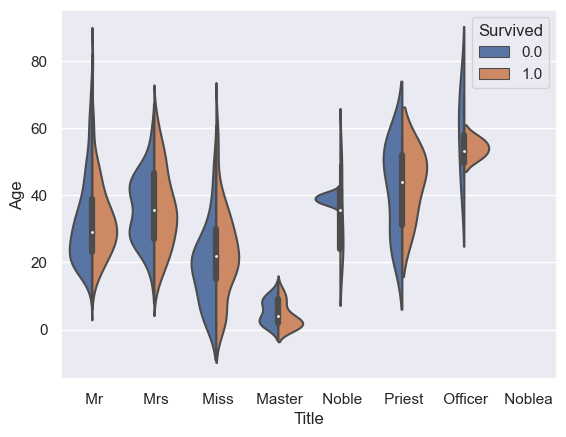

In [43]:
# 앞에서 정리한 Title 열의 분포를 그린다. 각타이틀 별 생존여부에 따른 승객 나이의 분포를 시본 violinplot함수에 그린다.
# Noble 타이틀을 가진 승객 중에서는 생존자가 없고, 
# Officer 타이틀을 가진 승객중에서 특정 나이대에 속하는 승객만 생존자가 있다는것을 알 수 있다.

sns.violinplot(x='Title',hue='Survived',y='Age',data=data,split=True)

In [44]:
# Title 열에 의미 있는 정보를 추출하여 저장했기 때문에 불필요해진 Name 열을 데이터 프레임에서 삭제한다. 
# drop 메소드를 사용하고 축 방향을 axis=1로 지정한다.

In [45]:
# Name 열 삭제

data=  data.drop('Name',axis=1)
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'TrainSplit', 'Title'],
      dtype='object')

In [46]:
# 승객 나이가 들어 있는 Age 열의 결측값을 확인한다. 같은 타이틀을 갖는 승객끼리 그룹을 나누고,
# 그룹별 승객 나이의 중간값으로 결측값을 대체한다.

In [47]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TrainSplit,Title
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,train,Mr
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,train,Mrs
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train,Miss
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,train,Mrs
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,train,Mr


In [48]:
# 결측값 확인 및 대체
for title in data['Title'].unique():
    ## 결측값 갯수 확인 
    print("%s 결측값 갯수 : "% title, data.loc[data['Title']==title,"Age"].isnull().sum())
    ## 각 title의 중간값으로 대체
    age_med = data.loc[data['Title']==title,"Age"].median()
    data.loc[data['Title']==title,'Age'] = data.loc[data['Title']==title,'Age'].fillna(age_med) 
    ### 결측값 처리 여부 확인
print('\n')
print("Age 열의 평균값 개수 :", data['Age'].isnull().sum())

 Mr 결측값 갯수 :  176
 Mrs 결측값 갯수 :  27
 Miss 결측값 갯수 :  51
 Master 결측값 갯수 :  8
 Noble 결측값 갯수 :  0
 Priest 결측값 갯수 :  1
 Officer 결측값 갯수 :  0
 Noblea 결측값 갯수 :  0


Age 열의 평균값 개수 : 0


In [49]:
# seaborn의 kind 옵션을 hist로 지정하여 히스토 그램을 그린다.
# hue 속성에 따라 생존자를 구분하여 출력한다.
# 5세 미만의 승객의 생존율이 높고 30세 전후에 승객의 생존율이 낮은 편이다.

In [50]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TrainSplit,Title
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,train,Mr
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,train,Mrs
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train,Miss
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,train,Mrs
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,train,Mr


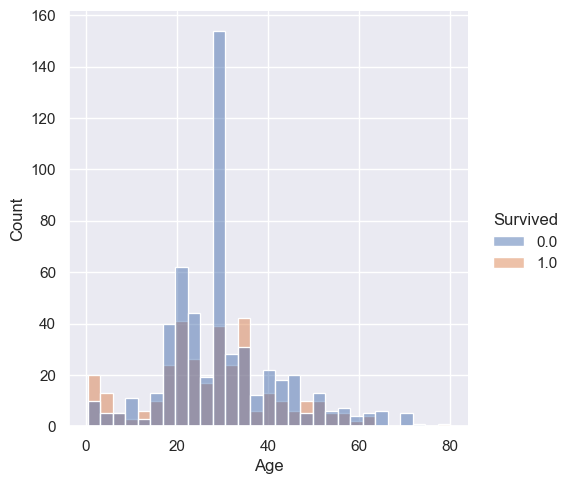

In [51]:
# Age의 분포
sns.displot(x='Age',kind='hist',hue='Survived',
            data=data[data['TrainSplit']=='train'])
plt.show()

- 나이에 따라 생존율 차이가 나기 때문에 앞의 히스토 그램 분포를 기준으로 Age 데이터를 여러 개의 구간으로 나눈다.
- 비닝 기법이라고 한다.
- 판다스의 cut함수를 사용하고 각 구간을 나누는 값으 경계값(Bins), 각 구간의 이름(lables)을 지정한다.
- 예를 들어, 0~4세는 infant, 4~8세까지는 Child, 8~12세는 Child2로 구분되어 정리된다.
- AgeBin 열을 만들어 추가한다.

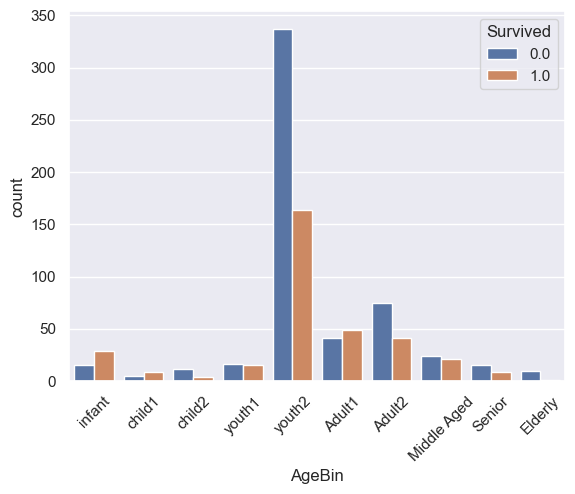

In [52]:
# Binning - 구간 나누기
bins = [0,4,8,12,16,32,36,48,56,64,100]
labels= ['infant','child1','child2','youth1','youth2', 'Adult1', 'Adult2', 'Middle Aged', 'Senior', 'Elderly']
data['AgeBin'] = pd.cut(data['Age'],bins=bins,labels=labels)
# Age_bin(나이 구간)에 따른 생존율 비교
sns.countplot(x='AgeBin',hue='Survived',data=data)
plt.xticks(rotation=45)
plt.show()

- 동승한 형제자매/배우자 수를 나타낸다. 상자 ㄱ ㅡ림을 그리는 boxplot 함수로 생존 여부를 표시하면
- 동승자가 2~3명일 경우 나이에 따른 생존 여부 차이가 있음을 알 수 있다. 

<Axes: xlabel='SibSp', ylabel='Age'>

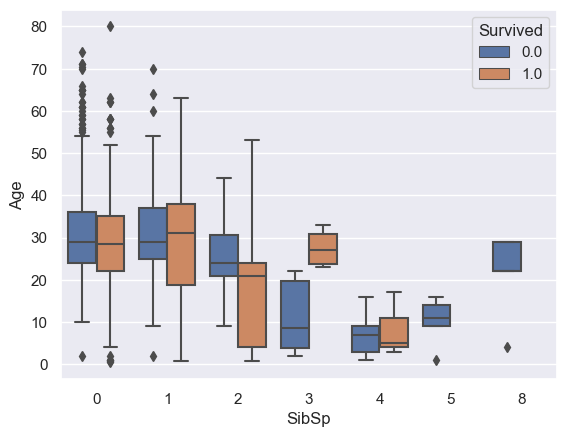

In [53]:
# 형제 자매/배우자 수와 승객 나이 및 생존율 관계
sns.boxplot(x='SibSp',y='Age',hue="Survived",data=data)


- 함께 탑승한 부모 또는 자식의 수를 나타낸다.
- boxplot 함수로 생존 여부와 함께 나이 분포를 그려보면
- 동승자가 4명 이상일 경우 생존자가 거의 없다는 사실을 알 수 있다.

<Axes: xlabel='Parch', ylabel='Age'>

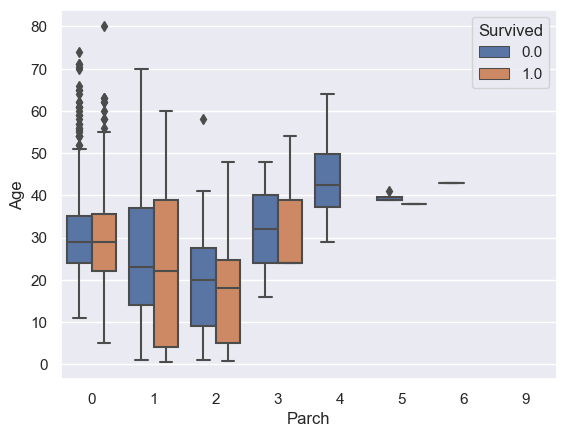

In [54]:
# 부모/자식 수에 따른 승객 나이 및 생존율 관계
sns.boxplot(x="Parch",y="Age",hue='Survived',data=data)

- SibSp 열과 Parch 열의 데이터를 더하면 함께 탑승한 모든 가족의 수를 계산할 수 있다.
- 이를 토대로 가족 수와 객실 등급을 기준으로 생존율의 차이를 확인한다.
- 가족 수에 따라 객실 등급에 따른 생존율에 차이가 있음을 알 수 있다.

<Axes: xlabel='Family', ylabel='Survived'>

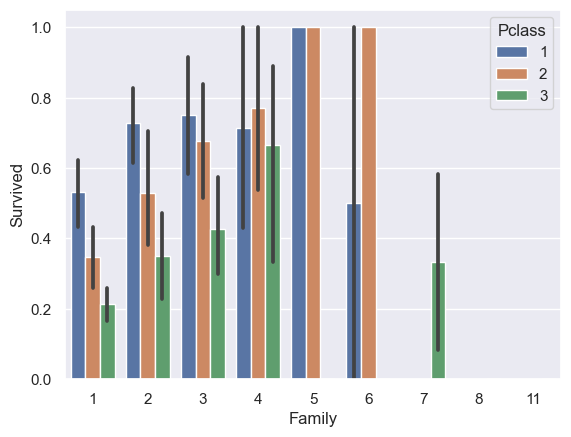

In [55]:
# 가족 구성원의 수
data['Family'] = data['Parch'] + data['SibSp'] + 1 


# 가족 구성원의 수와 생존율 관계
sns.barplot(x="Family",y='Survived',hue="Pclass",estimator=np.mean,data=data.loc[data['TrainSplit']=='train'])

In [56]:
# 탑승 요금을 나타내는 Fare 열에는 1개의 결측 데이터가 있다. 
# 결측값 확인
data.loc[data['Fare'].isnull(),:]


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TrainSplit,Title,AgeBin,Family
152,1044,NaN,3,1,60.5,0,0,3701,NaN,NaN,S,test,Mr,Senior,1


In [57]:
data_num.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.070323,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.366371,0.060832,0.018322,-0.558740
Age,-0.070323,-0.366371,1.000000,-0.190747,-0.130872,0.170619
SibSp,-0.035322,0.060832,-0.190747,1.000000,0.373587,0.160388
Parch,0.081629,0.018322,-0.130872,0.373587,1.000000,0.221668
Fare,0.257307,-0.558740,0.170619,0.160388,0.221668,1.000000


- 탑승 요금과 객실 등급의 상관관계가 높기 때문에 3등석 객실 승객의 탑승 요금의 평균값을 이용하여 결측값을 채워준다.

In [58]:
# 3등석 요금의 평균값을 가지고 결측값 대체
p3_fare_mean = data.loc[data['Pclass']==3,"Fare"].mean()
# print(p3_fare_mean)
data['Fare'] = data['Fare'].fillna(p3_fare_mean)
data.loc[data['PassengerId']==1044,:]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TrainSplit,Title,AgeBin,Family
152,1044,NaN,3,1,60.5,0,0,3701,13.302889,NaN,S,test,Mr,Senior,1


- Fare 열의 데이터는 연속적인 값을 갖는다. displot의 kind옵션을 'kde'로 설정하고 보면
- 왼쪽으로 치우친 비대칭 분포를 보인다.

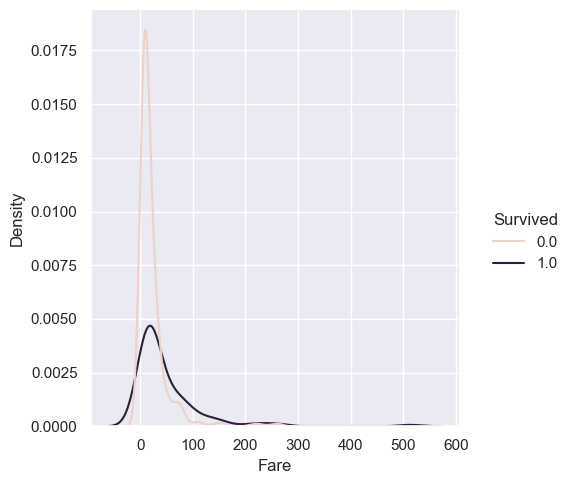

In [59]:
# fare 분포
sns.displot(x='Fare',kind='kde',hue="Survived",data=data)

- 비대칭 분포를 정규화 하기 위해 로그 변환을 한다. 넘파이 log1p 함수를 이용하여
- Fare 열의 데이터에 로그를 취하면, 다음과 같이 정규분포에 가까운 형태로 변환된다.
- 단, 요금이 낮은 쪽으로 데이터가 비어 있는 구간이 있다는 사실도 알 수 있다.

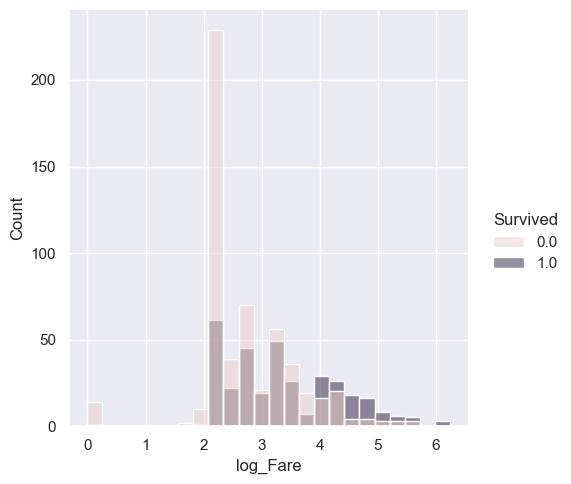

In [60]:
# log 변환
data['log_Fare'] = np.log1p(data['Fare'])
# FareLog 분포
sns.displot(x="log_Fare",data=data,kind='hist',hue="Survived")

In [61]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

# scaler.fit(data[['Fare']])
# scaled = scaler.transform(data[['Fare']])
# scaled
# print(scaled.__class__)
# print(list(scaled)) # numpy.ndarray를 list화
# sns.displot(x=scaled.tolist(), kind='hist', hue='Survived', data=data)
# plt.show()

<Axes: xlabel='Pclass', ylabel='log_Fare'>

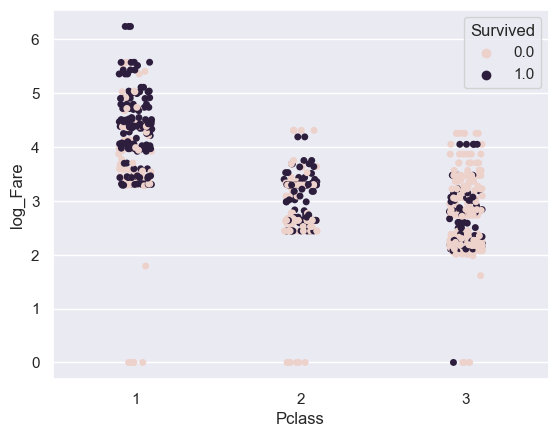

In [62]:
# stripplot 함수로 객실 등급에 따른 요금 분포를 그린다. 
# hue 속성으로 생존자 분포를 비교한다.
# 객실 등급 별 객실 요금 분포와 생존율
sns.stripplot(x="Pclass",hue="Survived",y="log_Fare",data=data)

In [63]:
# 결측값 확인
data.loc[data['Embarked'].isnull(),:]

# 탑승 항구를 나타내는 Embarked 열의 결측값은 2개로 확인된다.
Em_mode = data['Embarked'].mode()
print(Em_mode[0])
data['Embarked'] = data['Embarked'].fillna(Em_mode[0])

data.loc[data['PassengerId']==830,:]

S


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TrainSplit,Title,AgeBin,Family,log_Fare
829,830,1.0,1,0,62.0,0,0,113572,80.0,B28,S,train,Mrs,Senior,1,4.394449


- 탑승장소를 확인할 수 있는 방법이 뚜렷하지 않기 때문에 가장 탑승자가 많은 항구인 'S' 값으로 결측값을 채운다.
- 이떄 가장 많이 출현한 데이터인 최빈값은 mode함수로 구한다.

In [64]:
# 최빈값을 사용하여 결측값 처리
data['Embarked'].value_counts(dropna=False)


Embarked
S    916
C    270
Q    123
Name: count, dtype: int64

- 시본 catplot 함수의 kind 옵션을 point로 하면 각 클래스별 데이터 중심과 분산을 비교할 수 있다.
- 'C' 항구의 생존율이 높은 편이다.

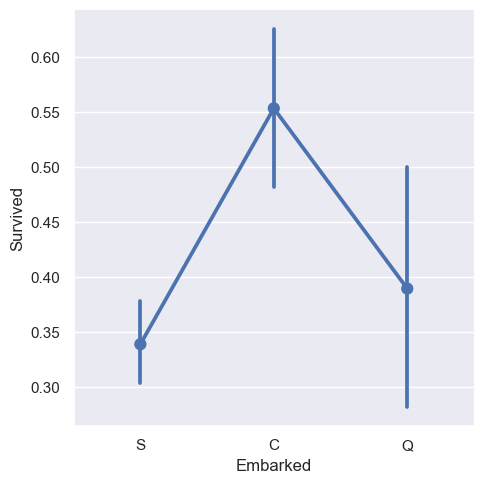

In [65]:
# 탑승 항구별 생존율 비교
sns.catplot(x="Embarked",y="Survived",data=data,kind='point')


In [66]:
# Cabin 열은 객실 구역을 나타내는 알파벳과 숫자로 이러우진다.
# 고유값 확인
data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

##### str 속성으로 문자열을 추출하고, slice 함수로 문자열의 첫글자만을 선택한다. 
##### 결측값이 1014개로 많은편이고, 이런경우 보통 모델학습에서 열을 삭제한 후 진행한다.
##### 여기서는 유의미한 정보인지 확인한다.

In [67]:
# 첫 번째 알파벳 이니셜 추출
data['Cabin'].str[0].value_counts(dropna=False)

Cabin
NaN    1014
C        94
B        65
D        46
E        41
A        22
F        21
G         5
T         1
Name: count, dtype: int64

###### 결측값을 'U'로 대채한다. 생존율 그래프로 그리면 구역별로 차이가 있다.
###### 특히 객실 구역 데이터가 없어서 결측값으로 분류된 'U'의 경우
###### 생존율이 가장 낮게 나타난다. 

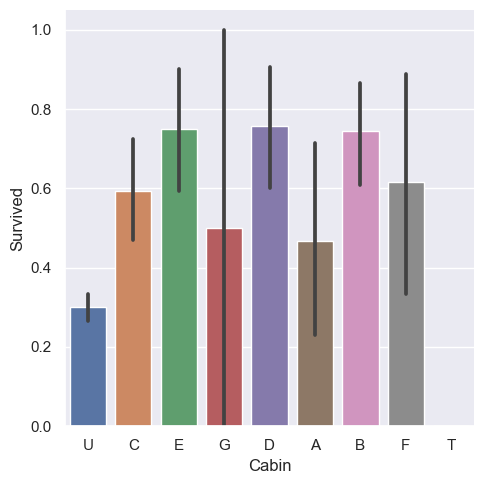

In [68]:
# 알파벳 이니셜로 대체, 결측값은 'U'로 입력
data['Cabin'] = data['Cabin'].str[0]
data['Cabin'] = data['Cabin'].fillna('U')
# Cabin 구역별 생존율 비교
sns.catplot(x='Cabin',y='Survived',kind='bar',data=data)

In [69]:
# 탑승권 번호를 나타내는 Ticket 열의 데이터는 알파벳과 숫자가 결합된 형태다.
# 고유값 확인
data['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [70]:
# 알파벳 부분만 따로 추출하여 정리한다.
# 문자열 정리 - 알파벳 추출
data['Ticket'] = data['Ticket'].str.replace(",","").str.replace("/","")
data['Ticket'] = data['Ticket'].str.strip().str.split(" ").str[0]


In [71]:
data['Ticket'].value_counts()

Ticket
PC           92
C.A.         46
SOTONO.Q.    16
W.C.         14
STONO        14
             ..
3460          1
350060        1
239854        1
4134          1
359309        1
Name: count, Length: 753, dtype: int64

In [72]:
# 숫자로만 이루어진 데이터를 'NUM'값으로 치환한다. 
# 탑승권 번호를 기준으로 생존율의 차이가 존재하므로
# 모델 학습에 사용할 만큼 유의미한 피처라고 볼 수 있다.


c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


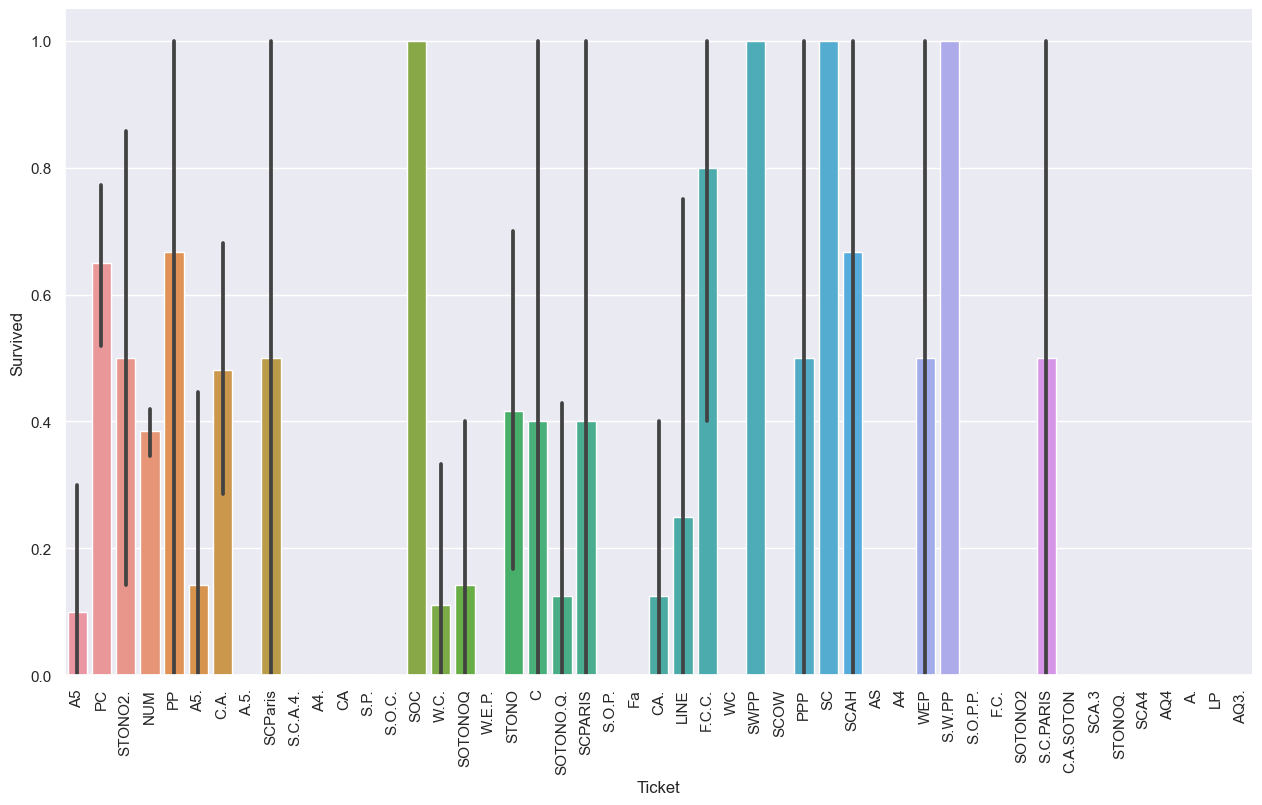

In [73]:
# 문자열이 숫자인 경우 "NUM"으로 대체(isdigit()-> 숫자인지 문자인지 확인)
data.loc[data['Ticket'].str.isdigit(),"Ticket"] = "NUM"
data['Ticket'].value_counts(dropna=False)

# Ticket 번호별 생존율 비교
fig = sns.catplot(x="Ticket",y="Survived",kind="bar",data=data)
fig.fig.set_size_inches(15,8)
plt.xticks(rotation=90)
plt.show()

##### 문자열 데이터로 이루어진 'Title' 열과 'AgeBin' 열의 범주형(문자열) 데이터를 숫자 레이블로 바꾼다.
##### 사이킷런 LabelEncoder 객체를 만들고, fit_transfrom 함수를 사용하여 각 열의 데이터에 적용한다.
##### 각 열에 속하는 범주의 개수만큼 숫자 레이블로 변환된다. 
###### 예를 들어 3개의 범주가 있으면 0,1,2와 같이 3개의 숫자를 사용하여 데이터를 바꿔준다

In [74]:
data['Title'].head()

0       Mr
1      Mrs
2     Miss
3      Mrs
4       Mr
Name: Title, dtype: object

In [75]:
data['AgeBin'].head()

0    youth2
1    Adult2
2    youth2
3    Adult1
4    Adult1
Name: AgeBin, dtype: category
Categories (10, object): ['infant' < 'child1' < 'child2' < 'youth1' ... 'Adult2' < 'Middle Aged' < 'Senior' < 'Elderly']

In [76]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
for col in ['Title','AgeBin']  :
    encoder = LabelEncoder()
    data[col] = encoder.fit_transform(data[col])

data.loc[:,['Title','AgeBin']].head()


,Title,AgeBin
0,2,9
1,3,1
2,1,9
3,3,0
4,2,0


- 문자열 데이터를 숫자형 데이터로 변환하는 다른 방법인 원 핫 인코딩 방법을 사용한다.
- 하나의 열을 범주 개수만큼 분할하여 범주에 해당하는 열에는 1을 입력하고 나머지 열에는 0을 입력한다. 
- 판다스 get_dummics 함수를 사용한다. colummns 속성에 원핫 인코딩할 열이름을 입력한다.
- prefix 옵션은 분할하여 생성되는 열 이름의 앞부분을 지정한다.
- 새로 만들어지는 열 이름은 [prefix + '_' + 범주형 데이터] 형태가 된다.
- Emb_Q 열은 Embarked의 앞 3글자를 따오고 데이터가 'Q'인 경우를 말한다.
- drop_first 옵션을 True로 지징허면 첫 번째 열을 삭제하는데, 
- 하나의 열이 없어도 원래 범주를 구분하는데 충분하기 떄문에 삭제한다.

In [77]:
# 범주형 변수로 변환 및 원 핫 인코딩
onehot_prefix= []
for col in ['Embarked','Cabin','Ticket']:
    data[col] = data[col].astype('category')
    data = pd.get_dummies(data,columns=[col],prefix=col[:3],drop_first=True,dtype='int')
    onehot_prefix.append(col[:3])
data.loc[:,[col for col in data.columns if col[:3] in onehot_prefix]].head()


,Emb_Q,Emb_S,Cab_B,Cab_C,Cab_D,Cab_E,Cab_F,Cab_G,Cab_T,Cab_U,...,Tic_SOTONO2,Tic_SOTONOQ,Tic_STONO,Tic_STONO2.,Tic_STONOQ.,Tic_SWPP,Tic_W.C.,Tic_W.E.P.,Tic_WC,Tic_WEP
0,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [83]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'TrainSplit', 'Title', 'AgeBin', 'Family', 'log_Fare', 'Emb_Q',
       'Emb_S', 'Cab_B', 'Cab_C', 'Cab_D', 'Cab_E', 'Cab_F', 'Cab_G', 'Cab_T',
       'Cab_U', 'Tic_A.5.', 'Tic_A4', 'Tic_A4.', 'Tic_A5', 'Tic_A5.',
       'Tic_AQ3.', 'Tic_AQ4', 'Tic_AS', 'Tic_C', 'Tic_C.A.', 'Tic_C.A.SOTON',
       'Tic_CA', 'Tic_CA.', 'Tic_F.C.', 'Tic_F.C.C.', 'Tic_Fa', 'Tic_LINE',
       'Tic_LP', 'Tic_NUM', 'Tic_PC', 'Tic_PP', 'Tic_PPP', 'Tic_S.C.A.4.',
       'Tic_S.C.PARIS', 'Tic_S.O.C.', 'Tic_S.O.P.', 'Tic_S.O.P.P.', 'Tic_S.P.',
       'Tic_S.W.PP', 'Tic_SC', 'Tic_SCA.3', 'Tic_SCA4', 'Tic_SCAH', 'Tic_SCOW',
       'Tic_SCPARIS', 'Tic_SCParis', 'Tic_SOC', 'Tic_SOTONO.Q.', 'Tic_SOTONO2',
       'Tic_SOTONOQ', 'Tic_STONO', 'Tic_STONO2.', 'Tic_STONOQ.', 'Tic_SWPP',
       'Tic_W.C.', 'Tic_W.E.P.', 'Tic_WC', 'Tic_WEP'],
      dtype='object')

In [84]:
# 사이킷런 MinMaxScaler를 사용하여 모델 학습에 사용할 피처의 스케일을 0~1 범위로 정규화처리
# 학습에 사용할 피처가 아닌 TrainSplit열을 제외한다.

# 피처 스케일링
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


# 스케일링 처리할 피처 선택 - TrainSplit 등 일부 열 제외
scaled_cols = [col for col in data.loc[:,'Pclass':].columns if col !='TrainSplit']
# print(data)
# data = data.drop('Sex', axis='columns')


# 스케일링 변환된 값을 데이터프레임에 반영
data_scaled = data.loc[:,scaled_cols]
data_scaled = scaler.fit_transform(data_scaled)
data.loc[:,scaled_cols] = data_scaled[:,:]
data.head()

# data.to_csv('submit.csv', index=False)
# Pclass,Sex,Age,SibSp,Parch,Fare,TrainSplit,Title,AgeBin,FamilySize,FareLog,Emb_Q,Emb_S,Cab_B,
# Cab_C,Cab_D,Cab_E,Cab_F,Cab_G,Cab_T,Cab_U,Tic_A.5.,Tic_A4,Tic_A4.,Tic_A5,Tic_A5.,Tic_AQ3.
# ,Tic_AQ4,Tic_AS,Tic_C,Tic_C.A.,Tic_C.A.SOTON,Tic_CA,Tic_CA.,Tic_F.C.,Tic_F.C.C.,Tic_Fa,Tic_LINE,Tic_LP
# ,Tic_NUM,Tic_PC,Tic_PP,Tic_PPP,Tic_S.C.A.4.,Tic_S.C.PARIS,Tic_S.O.C.,Tic_S.O.P.,Tic_S.O.P.P.,Tic_S.P.
# ,Tic_S.W.PP,Tic_SC,Tic_SCA.3,Tic_SCA4,Tic_SCAH,Tic_SCOW,Tic_SCPARIS,Tic_SCParis,Tic_SOC,Tic_SOTONO.Q.,Tic_SOTONO2,Tic_SOTONOQ,
# Tic_STONO,Tic_STONO2.,Tic_STONOQ.,Tic_SWPP,Tic_W.C.,Tic_W.E.P.,Tic_WC,Tic_WEP

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,TrainSplit,Title,...,Tic_SOTONO2,Tic_SOTONOQ,Tic_STONO,Tic_STONO2.,Tic_STONOQ.,Tic_SWPP,Tic_W.C.,Tic_W.E.P.,Tic_WC,Tic_WEP
0,1,0.0,1.0,1,0.273456,0.125,0.0,0.014151,train,0.285714,...,0,0,0,0,0,0,0,0,0,0
1,2,1.0,0.0,0,0.473882,0.125,0.0,0.139136,train,0.428571,...,0,0,0,0,0,0,0,0,0,0
2,3,1.0,1.0,0,0.323563,0.000,0.0,0.015469,train,0.142857,...,0,0,0,1,0,0,0,0,0,0
3,4,1.0,0.0,0,0.436302,0.125,0.0,0.103644,train,0.428571,...,0,0,0,0,0,0,0,0,0,0
4,5,0.0,1.0,1,0.436302,0.000,0.0,0.015713,train,0.285714,...,0,0,0,0,0,0,0,0,0,0


In [85]:
data['AgeBin'].head()

0    1.000000
1    0.111111
2    1.000000
3    0.000000
4    0.000000
Name: AgeBin, dtype: float64

##### TrainSplit 열의 데이터를 기준으로 필터링하여, 모델 학습에 사용할 데이터(X_train, y_train)와 
##### 정답을 예측해서 제출해야 하는 테스트 데이터(x_test)를 구분한다.

In [86]:
data.columns

Survived

PassengerId, 

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'TrainSplit', 'Title', 'AgeBin', 'Family', 'log_Fare', 'Emb_Q',
       'Emb_S', 'Cab_B', 'Cab_C', 'Cab_D', 'Cab_E', 'Cab_F', 'Cab_G', 'Cab_T',
       'Cab_U', 'Tic_A.5.', 'Tic_A4', 'Tic_A4.', 'Tic_A5', 'Tic_A5.',
       'Tic_AQ3.', 'Tic_AQ4', 'Tic_AS', 'Tic_C', 'Tic_C.A.', 'Tic_C.A.SOTON',
       'Tic_CA', 'Tic_CA.', 'Tic_F.C.', 'Tic_F.C.C.', 'Tic_Fa', 'Tic_LINE',
       'Tic_LP', 'Tic_NUM', 'Tic_PC', 'Tic_PP', 'Tic_PPP', 'Tic_S.C.A.4.',
       'Tic_S.C.PARIS', 'Tic_S.O.C.', 'Tic_S.O.P.', 'Tic_S.O.P.P.', 'Tic_S.P.',
       'Tic_S.W.PP', 'Tic_SC', 'Tic_SCA.3', 'Tic_SCA4', 'Tic_SCAH', 'Tic_SCOW',
       'Tic_SCPARIS', 'Tic_SCParis', 'Tic_SOC', 'Tic_SOTONO.Q.', 'Tic_SOTONO2',
       'Tic_SOTONOQ', 'Tic_STONO', 'Tic_STONO2.', 'Tic_STONOQ.', 'Tic_SWPP',
       'Tic_W.C.', 'Tic_W.E.P.', 'Tic_WC', 'Tic_WEP'],
      dtype='object')

In [ ]:
selected_features = ['Pclass','Sex','Age','SibSp','Parch','Fare','TrainSplit','Title','AgeBin','FamilySize','FareLog','Emb_Q','Emb_S','Cab_B',
                    'Cab_C','Cab_D','Cab_E','Cab_F','Cab_G','Cab_T','Cab_U','Tic_A.5.','Tic_A4','Tic_A4.','Tic_A5','Tic_A5.','Tic_AQ3.',
                    'Tic_AQ4','Tic_AS','Tic_C','Tic_C.A.','Tic_C.A.SOTON','Tic_CA','Tic_CA.','Tic_F.C.','Tic_F.C.C.','Tic_Fa','Tic_LINE','Tic_LP',
                    'Tic_NUM','Tic_PC','Tic_PP','Tic_PPP','Tic_S.C.A.4.','Tic_S.C.PARIS','Tic_S.O.C.','Tic_S.O.P.','Tic_S.O.P.P.','Tic_S.P.',
                    'Tic_S.W.PP','Tic_SC','Tic_SCA.3','Tic_SCA4','Tic_SCAH','Tic_SCOW','Tic_SCPARIS',
                    'Tic_SCParis','Tic_SOC','Tic_SOTONO.Q.','Tic_SOTONO2','Tic_SOTONOQ',
                    'Tic_STONO','Tic_STONO2.','Tic_STONOQ.','Tic_SWPP','Tic_W.C.','Tic_W.E.P.','Tic_WC','Tic_WEP']
len(selected_features)

In [89]:
# 학습용 데이터와 예측 대상인 테스트 데이터 구분
y_train = data.loc[data['TrainSplit']=='train','Survived']
# print(y_train)
x_train = data.loc[data['TrainSplit']=='train',:].drop(['Survived','PassengerId'],axis=1)
x_test = data.loc[data['TrainSplit']=='test',:].drop(['Survived','PassengerId'],axis=1)
print("Train 데이터셋 크기:", x_train.shape, y_train.shape)
print("Test 데이터셋 크기:", x_test.shape)



Train 데이터셋 크기: (891, 69) (891,)
Test 데이터셋 크기: (418, 69)


In [91]:
print(x_train)


     Pclass  Sex       Age  SibSp     Parch      Fare TrainSplit     Title  \
0       1.0    1  0.273456  0.125  0.000000  0.014151      train  0.285714   
1       0.0    0  0.473882  0.125  0.000000  0.139136      train  0.428571   
2       1.0    0  0.323563  0.000  0.000000  0.015469      train  0.142857   
3       0.0    0  0.436302  0.125  0.000000  0.103644      train  0.428571   
4       1.0    1  0.436302  0.000  0.000000  0.015713      train  0.285714   
..      ...  ...       ...    ...       ...       ...        ...       ...   
886     0.5    1  0.336089  0.000  0.000000  0.025374      train  1.000000   
887     0.0    0  0.235876  0.000  0.000000  0.058556      train  0.142857   
888     1.0    0  0.273456  0.125  0.222222  0.045771      train  0.142857   
889     0.0    1  0.323563  0.000  0.000000  0.058556      train  0.285714   
890     1.0    1  0.398722  0.000  0.000000  0.015127      train  0.285714   

       AgeBin  Family  ...  Tic_SOTONO2  Tic_SOTONOQ  Tic_STONO

모델 학습에 사용할 데이터를 훈련데이터(x_tr, y_tr)와 검증데이터(x_val, y_val)로 분할한다. 

In [93]:
# 훈련 - 검증 데이터 분할
from sklearn.model_selection import train_test_split

x_tr,x_val,y_tr,y_val = train_test_split(x_train,y_train,test_size=0.2,shuffle=3,random_state=23)
print("훈련 데이터셋 크기:", x_tr.shape, y_tr.shape)
print("검증 데이터 셋 크기:", x_val.shape, y_val.shape)


훈련 데이터셋 크기: (712, 69) (712,)
검증 데이터 셋 크기: (179, 69) (179,)


로지스틱 회귀 분류 모델을 훈련하고, 검증 데이터의 정확도와 비교한다. 

훈련데이더보다 검증데이터의 점수가 높은 편으로 모델 학습이 필요한 과소 적합 상태로 판단된다.

In [95]:
x_tr = x_tr.drop('TrainSplit',axis=1)
x_val = x_val.drop('TrainSplit',axis=1)

In [97]:
# 로지스틱 회귀 모델
lr_model = LogisticRegression()
lr_model.fit(x_tr,y_tr)
y_tr_pred = lr_model.predict(x_tr)
print("훈련 Accuracy:%.4f" % accuracy_score(y_tr, y_tr_pred))
print("훈련 ACU:%.4f" % roc_auc_score(y_tr, y_tr_pred))

y_val_pred = lr_model.predict(x_val)
print("검증 Accuracy:%.4f" % accuracy_score(y_val, y_val_pred))
print("검증 AUC:%.4f" % roc_auc_score(y_val, y_val_pred))

훈련 Accuracy:0.8287
훈련 ACU:0.8148
검증 Accuracy:0.7765
검증 AUC:0.7499


In [102]:
x_test = x_test.drop('TrainSplit',axis=1)

KeyError: "['TrainSplit'] not found in axis"

In [103]:

x_train = x_train.drop(['TrainSplit'], axis=1)

##### 테스트 데이터에 대한 예측값을 제출 파일 형식의 Survived 열에 입력하고 저장한다

In [104]:
# test 데이터 예측 및 제출 파일 저장
# y_test_pred = lr_model.predict(x_test)
# submission['Survived'] = y_test_pred.astype(int)
# submission.to_csv(index=False)

랜덤 포레스트 모델로 분류 - 5-Flod 교차 검증으로 ACU 스코어를 확인한다.

In [105]:
# 랜덤 포레스트
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=23)

from sklearn.model_selection import cross_val_score
auc_scores = cross_val_score(lr_model,x_train,y_train,cv=5,scoring='roc_auc')
print("개별 Fold의 AUC 점수 :", np.round(auc_scores, 4))
print("평균 AUC 점수:", np.round(np.mean(auc_scores), 4))

개별 Fold의 AUC 점수 : [0.8449 0.8212 0.8819 0.8497 0.8876]
평균 AUC 점수: 0.8571


In [109]:
# test 데이터 예측 및 제출 파일 저장
rf_model.fit(x_train,y_train)

# y_test_pred = rf_model.predict(x_test)
# submission['Survived'] = y_test_pred.astype(int)
# submission.to_csv(index=False)

RandomForestClassifier(random_state=23)

##### 피처 중요도
###### 랜덤 포레스트와 같이 트리 기반의 알고리즘을 사용하면 트리를 나누는 기준이 되는 피처의 중요도를 측정할 수 있다.
###### 다음과 같이 트리 기반 모델이 각 피처를 어느 정도 참조하는 지 나타내는 중요도 막대 그래프를 그리는 함수를 정의해서 사용한다.

In [118]:
rf_model.feature_importances_

array([4.64120982e-02, 1.46110617e-01, 1.51514905e-01, 3.50566215e-02,
       2.18935702e-02, 1.16288554e-01, 1.17713432e-01, 4.40910974e-02,
       4.09345309e-02, 1.23827012e-01, 8.44368847e-03, 1.98493512e-02,
       7.98206862e-03, 7.09260823e-03, 7.92984947e-03, 8.10394194e-03,
       2.00121919e-03, 1.49526707e-03, 5.08711108e-04, 3.13259104e-02,
       1.07556020e-04, 1.79797075e-04, 3.11801921e-04, 1.28953765e-03,
       3.43590268e-03, 0.00000000e+00, 0.00000000e+00, 4.48548162e-05,
       2.60695928e-03, 2.59775760e-03, 1.35420646e-04, 8.27595683e-04,
       1.26482141e-03, 3.44628643e-04, 1.48524825e-03, 1.13488656e-05,
       1.49004477e-03, 0.00000000e+00, 1.37111078e-02, 7.23059884e-03,
       3.97528331e-04, 2.22665742e-04, 5.18980445e-05, 5.80233802e-05,
       8.75852144e-04, 2.94592580e-04, 1.18998891e-03, 7.46681700e-06,
       1.96050905e-03, 1.89100106e-04, 0.00000000e+00, 0.00000000e+00,
       3.79783464e-04, 1.87969990e-05, 9.69034057e-04, 4.91468601e-04,
      

In [115]:
a=np.argsort(rf_model.feature_importances_)
a

array([26, 62, 37, 51, 50, 25, 47, 35, 53, 66, 27, 42, 58, 43, 20, 30, 21,
       49, 41, 45, 22, 33, 56, 52, 40, 55, 18, 67, 65, 31, 44, 59, 54, 46,
       32, 23, 61, 34, 36, 17, 57, 48, 16, 29, 28, 64, 63, 24, 60, 13, 39,
       14, 12, 15, 10, 38, 11,  4, 19,  3,  8,  7,  0,  5,  6,  9,  1,  2],
      dtype=int64)

In [117]:
features=x_train.columns
features

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Title', 'AgeBin',
       'Family', 'log_Fare', 'Emb_Q', 'Emb_S', 'Cab_B', 'Cab_C', 'Cab_D',
       'Cab_E', 'Cab_F', 'Cab_G', 'Cab_T', 'Cab_U', 'Tic_A.5.', 'Tic_A4',
       'Tic_A4.', 'Tic_A5', 'Tic_A5.', 'Tic_AQ3.', 'Tic_AQ4', 'Tic_AS',
       'Tic_C', 'Tic_C.A.', 'Tic_C.A.SOTON', 'Tic_CA', 'Tic_CA.', 'Tic_F.C.',
       'Tic_F.C.C.', 'Tic_Fa', 'Tic_LINE', 'Tic_LP', 'Tic_NUM', 'Tic_PC',
       'Tic_PP', 'Tic_PPP', 'Tic_S.C.A.4.', 'Tic_S.C.PARIS', 'Tic_S.O.C.',
       'Tic_S.O.P.', 'Tic_S.O.P.P.', 'Tic_S.P.', 'Tic_S.W.PP', 'Tic_SC',
       'Tic_SCA.3', 'Tic_SCA4', 'Tic_SCAH', 'Tic_SCOW', 'Tic_SCPARIS',
       'Tic_SCParis', 'Tic_SOC', 'Tic_SOTONO.Q.', 'Tic_SOTONO2', 'Tic_SOTONOQ',
       'Tic_STONO', 'Tic_STONO2.', 'Tic_STONOQ.', 'Tic_SWPP', 'Tic_W.C.',
       'Tic_W.E.P.', 'Tic_WC', 'Tic_WEP'],
      dtype='object')

In [119]:
# test 계열 알고리즘 feature intortance 그래프
# argsort 는 importance를 sort하는데 그게 index로 표현된거같음
# importance -> 피쳐의 중요도가 나와있음
# indice - > 피쳐의 중요도순으로 정렬을 하는데 그거의 인덱스로 표현
# indice에 해당하는 걸로 feature이름을 정의
# indice에 해당하는 피쳐의 중요도임  
def plot_importance(model,features):
    importances = model.feature_importances_
    indices = np.argsort(importances)
    feature_names = [features[i] for i in indices]
    feature_imp  = importances[indices]

    plt.figure(figsize= (10,12))
    plt.title('Feature importance')
    plt.barh(range(len(indices)),feature_imp,align='center')
    plt.yticks(range(len(indices)),feature_names)
    plt.xlabel("Realtive Importance")
    print("피처:", list(reversed(feature_names)))
    print("중요도:", list(reversed(feature_imp)))   
    
    return list(reversed(feature_names)), list(reversed(feature_imp))

    

피처 중요도에 따라 피처 이름과 중요도 값을 출력한다. 

그리고 막대 그래프를 표시한다. FareLog 열과 Sex 열 순서로 중요하게 판단하고 있음을 알 수 있다.

피처: ['Age', 'Sex', 'log_Fare', 'Title', 'Fare', 'Pclass', 'AgeBin', 'Family', 'SibSp', 'Cab_U', 'Parch', 'Emb_S', 'Tic_NUM', 'Emb_Q', 'Cab_E', 'Cab_B', 'Cab_D', 'Tic_PC', 'Cab_C', 'Tic_STONO', 'Tic_A5.', 'Tic_SWPP', 'Tic_W.C.', 'Tic_C', 'Tic_C.A.', 'Cab_F', 'Tic_S.W.PP', 'Tic_SOTONO.Q.', 'Cab_G', 'Tic_LINE', 'Tic_F.C.C.', 'Tic_STONO2.', 'Tic_A5', 'Tic_CA.', 'Tic_S.O.P.P.', 'Tic_SCPARIS', 'Tic_SOTONOQ', 'Tic_S.O.C.', 'Tic_CA', 'Tic_W.E.P.', 'Tic_WEP', 'Cab_T', 'Tic_SCParis', 'Tic_PP', 'Tic_SCAH', 'Tic_SOC', 'Tic_F.C.', 'Tic_A4.', 'Tic_S.O.P.', 'Tic_PPP', 'Tic_SC', 'Tic_A4', 'Tic_C.A.SOTON', 'Tic_A.5.', 'Tic_S.C.PARIS', 'Tic_SOTONO2', 'Tic_S.C.A.4.', 'Tic_AS', 'Tic_WC', 'Tic_SCOW', 'Tic_Fa', 'Tic_S.P.', 'Tic_AQ3.', 'Tic_SCA.3', 'Tic_SCA4', 'Tic_LP', 'Tic_STONOQ.', 'Tic_AQ4']
중요도: [0.15151490500830037, 0.14611061724681282, 0.1238270117674415, 0.11771343248657809, 0.11628855426485499, 0.04641209824688811, 0.04409109743869144, 0.0409345308660513, 0.03505662147589211, 0.03132591039881533, 0.

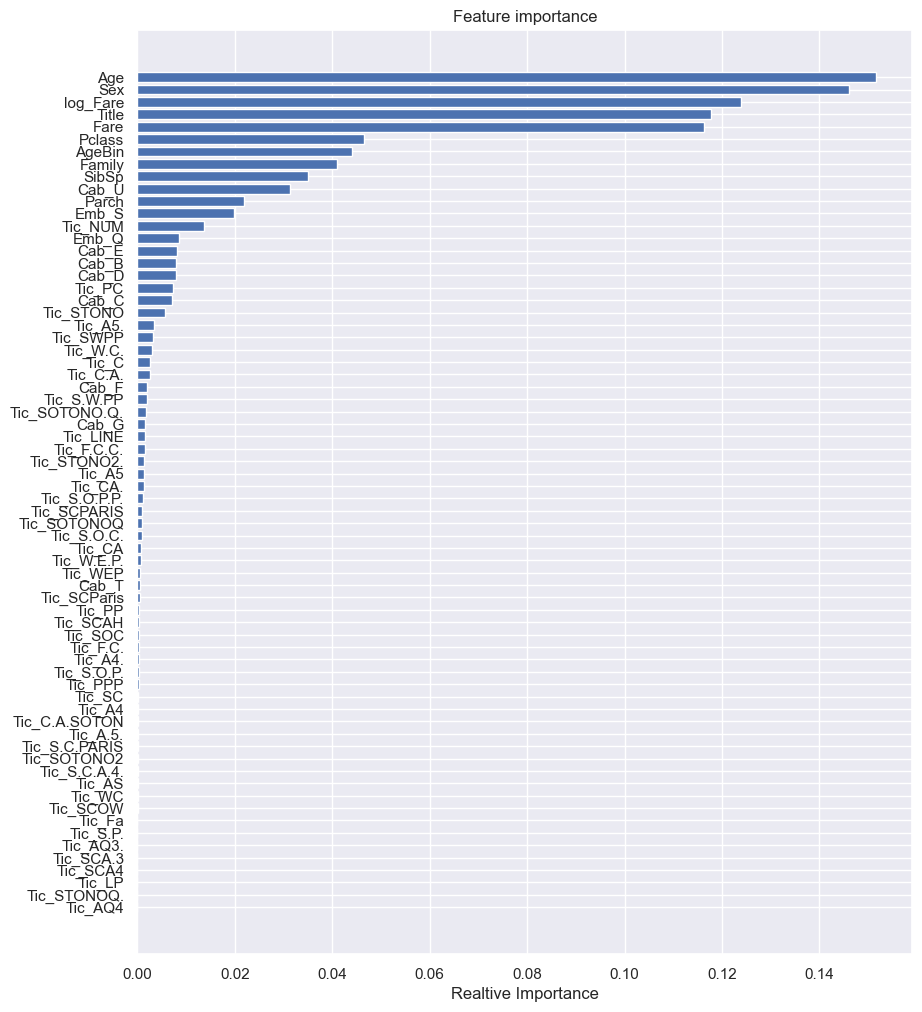

In [120]:
# 랜덤 포레스트 모델의 피처 중요도

imp_features,imp_socres = plot_importance(rf_model,features)


In [121]:
# 상위 10개 피처만 선택
features = imp_features[:10]
y_train = data.loc[data['TrainSplit']=='train',"Survived"]
x_train = data.loc[data['TrainSplit']=='train',features]
x_test = data.loc[data['TrainSplit']=='test',features]



print("Train 데이터셋 크기:", x_train.shape, y_train.shape)
print("Test 데이터셋 크기 :", x_test.shape)

Train 데이터셋 크기: (891, 10) (891,)
Test 데이터셋 크기 : (418, 10)


In [122]:
x_train.head()

,Age,Sex,log_Fare,Title,Fare,Pclass,AgeBin,Family,SibSp,Cab_U
0,0.273456,1,0.338125,0.285714,0.014151,1.0,1.000000,0.1,0.125,1
1,0.473882,0,0.685892,0.428571,0.139136,0.0,0.111111,0.1,0.125,0
2,0.323563,0,0.350727,0.142857,0.015469,1.0,1.000000,0.0,0.000,1
3,0.436302,0,0.639463,0.428571,0.103644,0.0,0.000000,0.1,0.125,0
4,0.436302,1,0.352955,0.285714,0.015713,1.0,0.000000,0.0,0.000,1


In [ ]:
# print(x_train)

# print(x_test)


In [ ]:
# 10개의 피처만 가지고 랜덤포레스트 모델을 같은 조건에서 재학습한다.
# 교차검증에서 AUC스코어가 오르는 것을 확인할 수 있다.

# 랜덤포레스트
rf_model = RandomForestClassifier(random_state=324)
auc_scores = cross_val_score(rf_model,x_train,y_train,cv=5)

print("개별 Fold의 AUC 점수 :", np.round(auc_scores, 4))
print("평균 AUC 점수:", np.round(np.mean(auc_scores), 4))
# rf_model.fit(x_train, y_train)
# y_test_pred = rf_model.predict(x_test)
# submission['Survived'] = y_test_pred.astype(int)
# submission.to_csv(index=False)

개별 Fold의 AUC 점수 : [0.8447 0.8123 0.8962 0.8481 0.9059]
평균 AUC 점수: 0.8614


In [124]:
# XGBoost
from xgboost import XGBClassifier
xgb_model = XGBClassifier(max_depth = 3, random_state=12)
auc_scores = cross_val_score(xgb_model,x_train,y_train,cv=5,scoring='roc_auc')
print("개별 Fold의 AUC 점수:", np.round(auc_scores, 4))
print("평균 AUC 점수:", np.round(np.mean(auc_scores), 4))
# xgb_model.fit(x_train, y_train)
# y_test_pred = xgb_model.predict(x_test)
# submission['Survived'] = y_test_pred.astype(int)
# submission.to_csv(index=False)

개별 Fold의 AUC 점수: [0.8736 0.8125 0.9049 0.8624 0.8968]
평균 AUC 점수: 0.87


##### 분류 확률값
###### 데이콘 리더보드 점수는 AUC 스코어로 계산된다. AUC 스코어를 계산할 때 분류 레이블(사망 0, 생존 1)
###### 대신, 생존으로 분류할 확률값(0~1 범위)을 사용한다. 
###### 따라서 predict_proba로 분류 확률값을 예측하여 정답 파일을 만들면 데이콘 리더보드 점수가 개선된다.

In [127]:
x_test

,Age,Sex,log_Fare,Title,Fare,Pclass,AgeBin,Family,SibSp,Cab_U
0,0.430039,1,0.348997,0.285714,0.015282,1.0,0.000000,0.0,0.000,1
1,0.586622,0,0.333195,0.428571,0.013663,1.0,0.111111,0.1,0.125,1
2,0.774521,1,0.379604,0.285714,0.018909,0.5,0.444444,0.0,0.000,1
3,0.336089,1,0.363449,0.285714,0.016908,1.0,1.000000,0.0,0.000,1
4,0.273456,0,0.414494,0.428571,0.023984,1.0,1.000000,0.2,0.125,1
...,...,...,...,...,...,...,...,...,...,...
413,0.361142,1,0.352955,0.285714,0.015713,1.0,1.000000,0.0,0.000,1
414,0.486409,0,0.753026,0.714286,0.212559,0.0,0.111111,0.0,0.000,0
415,0.480145,1,0.338125,0.285714,0.014151,1.0,0.111111,0.0,0.000,1
416,0.361142,1,0.352955,0.285714,0.015713,1.0,1.000000,0.0,0.000,1


In [128]:
# 확률값 예측
xgb_model.fit(x_train,y_train)
rf_model.fit(x_train,y_train)
y_xgb_proba = xgb_model.predict(x_test)

y_rf_proba = rf_model.predict(x_test)
# 앙상블 기법
y_proba = (y_xgb_proba + y_rf_proba) /2 
print(y_proba.shape)

# submission['Survived'] = y_proba
# submission.to_csv(index=False)

(418,)
